### This part trains a neural network so the model can give correct results.
Reads the dataset and presents the location and the journeys to the network so it can be trained.
The result of the training is shown below, the model reaches 100% after 3 epochs. The network continues to get better and both the training loss and the validation loss decreases. This means that it will generalise better if it is given data from the same distribution.
This will be tested below...

epoch,train_loss,valid_loss,accuracy
1,1.896222,1.911966,0.178571
2,1.436965,1.726557,0.750000
3,1.111838,1.398489,1.000000
4,0.895433,1.049875,1.000000
5,0.738659,0.766617,1.000000
6,0.621754,0.574967,1.000000
7,0.534375,0.444890,1.000000
8,0.467260,0.354125,1.000000
9,0.415046,0.296186,1.000000
10,0.372076,0.250501,1.000000


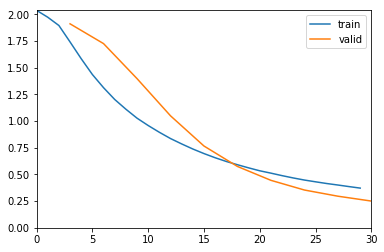

CPU times: user 4.05 s, sys: 3.03 s, total: 7.08 s
Wall time: 7.96 s


In [9]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
dataSet = pd.read_csv("data.csv")
cont_names =['longitude','latitude']
valid_idx = list(np.random.randint(0,len(dataSet),int(len(dataSet)*0.1)))
data = (TabularList.from_df(dataSet,cont_names=cont_names, procs=[FillMissing, Categorify, Normalize])
    .split_by_idx(valid_idx)
    .label_from_df(cols='journey')
    .databunch())
learner=tabular_learner(data, layers=[800,200],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(10)

### Ok time to test it
Read in the test file and check so the trained model gives correct results.

In [13]:
result = 0
accuracy = 0
dataTestSet = pd.read_csv("dataTest.csv")
for x in range(0,dataTestSet.shape[0]):
    correct = int(dataTestSet.iloc[x].journey)  #remove journey
    predicted = learner.predict(dataTestSet.iloc[x]);
    if (str(correct)==str(predicted[0])):
        result=result+1
accuracy=result/dataTestSet.shape[0]
print (str(accuracy*100)+"% of the rows were correct.")

100.0% of the rows were correct.
